<a href="https://colab.research.google.com/github/Soooheee/network/blob/main/network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**「Pythonで学ぶネットワーク分析 ColaboratoryとNetworkXを使った実践入門」**


第2章　ネットワーク分析の流れを知る

Saving lesmis.gml to lesmis.gml
User uploaded file "lesmis.gml" with length 17610 bytes


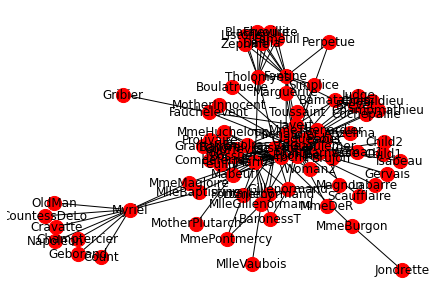

In [2]:
# リスト 2.1 ネットワークの読み込みと可視化
import networkx as nx
from google.colab import files
uploaded = files.upload() #lesmis.gmlをアップロード
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)
  nx.draw_spring(G, node_size=200, node_color='red', with_labels=True)

Saving lesmis.gml to lesmis (1).gml
User uploaded file "lesmis.gml" with length 17610 bytes


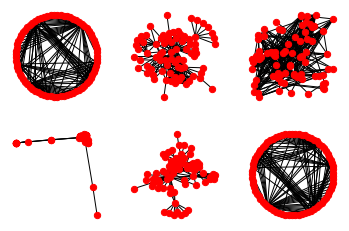

In [3]:
# リスト 2.2 ネットワークのさまざまな可視化
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)

plt.subplot(231)
nx.draw_circular(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(232)
nx.draw_kamada_kawai(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(233)
nx.draw_random(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(234)
nx.draw_spectral(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(235)
nx.draw_spring(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(236)
nx.draw_shell(G, node_size=40, node_color='red', with_labels=False)

Saving lesmis.gml to lesmis (2).gml
User uploaded file "lesmis.gml" with length 17610 bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  # Remove the CWD from sys.path while we load stuff.


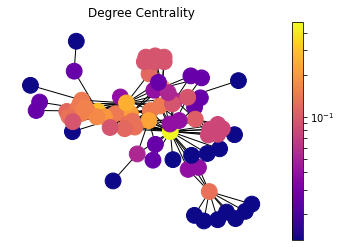

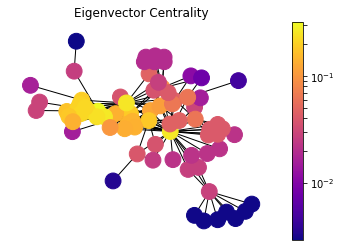

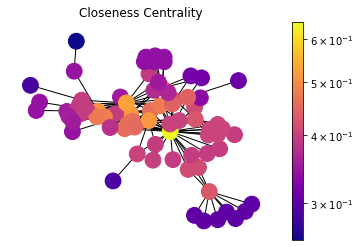

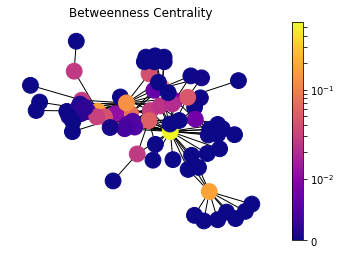

In [4]:
# リスト 2.3 4種類のネットワーク中心性
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def draw_h(G, pos, measures, measure_name):    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

import numpy as np
import numpy.linalg as LA
from pprint import pprint
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)
pos = nx.spring_layout(G)
draw_h(G, pos, nx.degree_centrality(G), 'Degree Centrality')
draw_h(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
draw_h(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
draw_h(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')


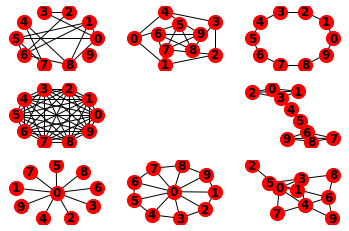

In [6]:
# リスト 2.4 さまざまな構造のネットワーク
import networkx as nx
import matplotlib.pyplot as plt
rnd = nx.gnp_random_graph(10,0.3)
plt.subplot(331)
nx.draw_circular(rnd, node_size=200, node_color='red', with_labels=True, font_weight='bold')

petersen = nx.petersen_graph()
plt.subplot(332)
nx.draw_shell(petersen, nlist=[range(5, 10), range(5)], node_size=200, node_color='red', with_labels=True, font_weight='bold')

cycle = nx.cycle_graph(10)
plt.subplot(333)
nx.draw_circular(cycle, node_size=200, node_color='red', with_labels=True, font_weight='bold')

K_10 = nx.complete_graph(10)
plt.subplot(334)
nx.draw_circular(K_10, node_size=200, node_color='red', with_labels=True, font_weight='bold')

# K_5_5 = nx.complete_bipartite_graph(5, 5)
# plt.subplot(335)
# nx.draw_circular(K_5_5, nlist=[range(5, 10), range(5)], node_size=200, node_color='red', with_labels=True, font_weight='bold')

barbell = nx.barbell_graph(4, 2)
plt.subplot(336)
nx.draw_spring(barbell, node_size=200, node_color='red', with_labels=True, font_weight='bold')

star = nx.star_graph(9)
plt.subplot(337)
nx.draw(star, node_size=200, node_color='red', with_labels=True, font_weight='bold')

wheel = nx.wheel_graph(10)
plt.subplot(338)
nx.draw(wheel, node_size=200, node_color='red', with_labels=True, font_weight='bold')

ba = nx.barabasi_albert_graph(10, 2)
plt.subplot(339)
nx.draw_spring(ba, node_size=200, node_color='red', with_labels=True, font_weight='bold')

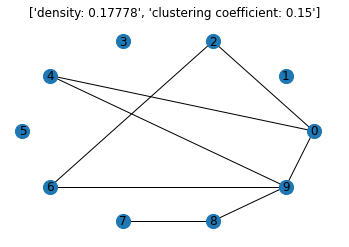

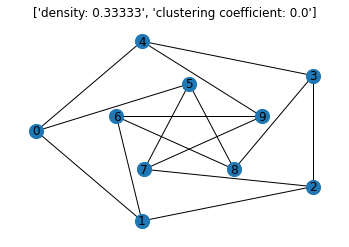

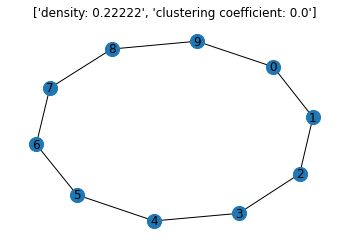

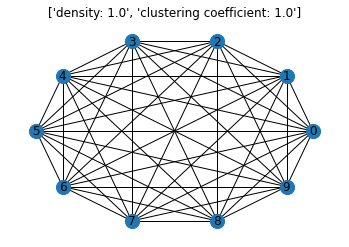

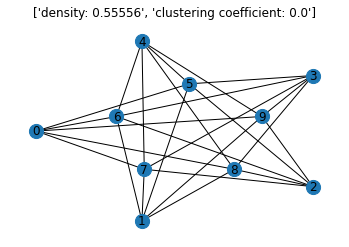

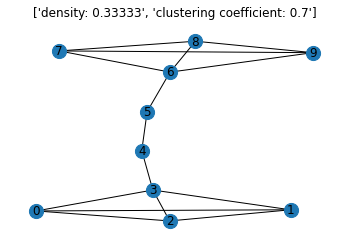

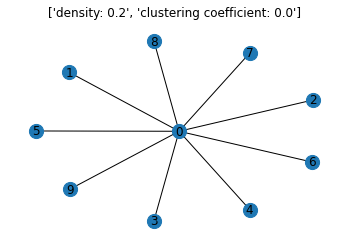

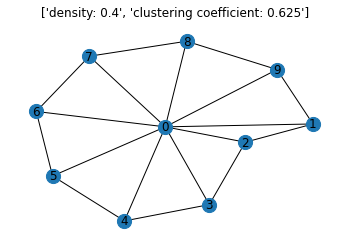

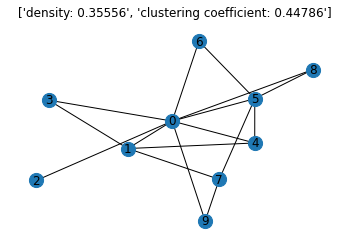

In [7]:
# リスト 2.5 ネットワークの密度とクラスタ係数
import networkx as nx
import matplotlib.pyplot as plt

def draw_m(G, pos):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200)     
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(['density: {:.5}'.format(nx.density(G)), 'clustering coefficient: {:.5}'.format(nx.average_clustering(G))])
    plt.axis('off')
    plt.show()

rnd = nx.gnp_random_graph(10,0.1)
pos = nx.circular_layout(rnd)
draw_m(rnd, pos)

petersen = nx.petersen_graph()
pos = nx.shell_layout(petersen, nlist=[range(5, 10), range(5)])
draw_m(petersen, pos)

cycle = nx.cycle_graph(10)
pos = nx.spring_layout(cycle)
draw_m(cycle, pos)

K_10 = nx.complete_graph(10)
pos = nx.circular_layout(K_10)
draw_m(K_10, pos)

K_5_5 = nx.complete_bipartite_graph(5, 5)
pos = nx.shell_layout(K_5_5, nlist=[range(5, 10), range(5)])
draw_m(K_5_5, pos)

barbell = nx.barbell_graph(4, 2)
pos = nx.spring_layout(barbell)
draw_m(barbell, pos)

star = nx.star_graph(9)
pos = nx.spring_layout(star)
draw_m(star, pos)

wheel = nx.wheel_graph(10)
pos = nx.spring_layout(wheel)
draw_m(wheel, pos)

ba = nx.barabasi_albert_graph(10, 2)
pos = nx.spring_layout(ba)
draw_m(ba, pos)

Saving lesmis.gml to lesmis (3).gml
User uploaded file "lesmis.gml" with length 17610 bytes


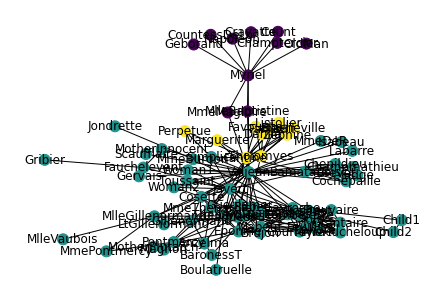

In [8]:
# リスト 2.6 コミュニティの抽出
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from networkx.algorithms import community
import pandas as pd

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)  

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'], node_size=120, with_labels=True)


Saving lesmis.gml to lesmis (4).gml
User uploaded file "lesmis.gml" with length 17610 bytes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

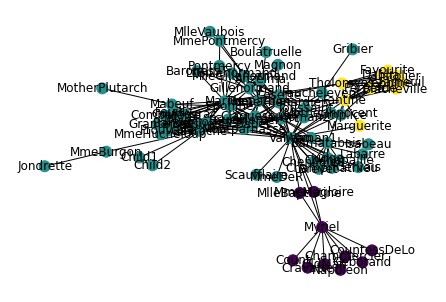

In [9]:
# リスト 2.7 ネットワーク可視化の画像の出力
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from networkx.algorithms import community
import pandas as pd

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)  

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'], node_size=120, with_labels=True)

savefn = fn.split('.')[0]+'.png'
plt.savefig(savefn)
files.download(savefn) 


第3章　必要な用語を学ぶ－ネットワークの基礎知識

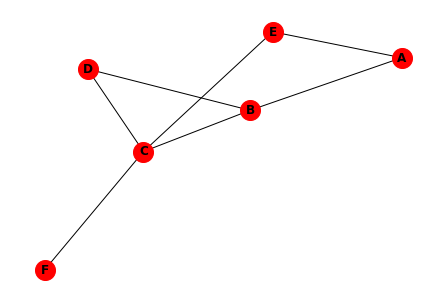

In [10]:
# リスト 3.1 6つの頂点(A, B, C, D, E, F)のネットワーク
import networkx as nx
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

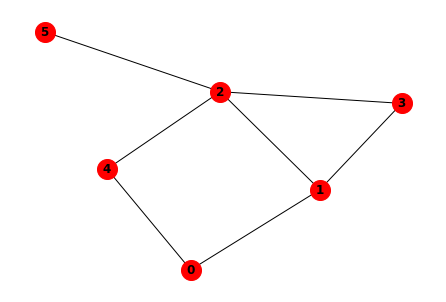

In [11]:
# リスト 3.2 6つの頂点(0, 1, 2, 3, 4, 5)のネットワーク
import networkx as nx
G = nx.Graph()
G.add_nodes_from([i for i in range(6)])
G.add_edges_from([(0, 1), (1, 2), (1 ,3), (2, 3), (2, 5), (0, 4), (2, 4)])
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

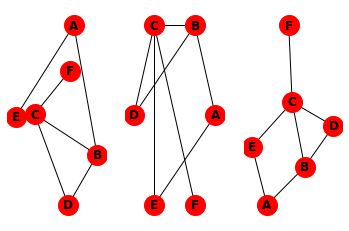

In [12]:
# リスト 3.3 ランダム、円周上、バネモデルによる描画
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
plt.subplot(131)
nx.draw_random(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
plt.subplot(132)
nx.draw_circular(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
plt.subplot(133)
nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

In [13]:
# リスト 3.4 ネットワークの頂点や辺の表示
import networkx as nx
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
print("number of nodes:", G.number_of_nodes())
print(G.nodes())
print("number of edges:", G.number_of_edges())
print(G.edges())

number of nodes: 6
['A', 'B', 'C', 'D', 'E', 'F']
number of edges: 7
[('A', 'B'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('C', 'F')]


In [14]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
print("number of nodes =", G.number_of_nodes())
print(G.nodes())
print("number of edges =", G.number_of_edges())
print(G.edges())
print("sparse adjacency matrix:")
print(nx.adjacency_matrix(G))
print("dense adjacency matrix:")
print(nx.adjacency_matrix(G).todense())

number of nodes = 6
['A', 'B', 'C', 'D', 'E', 'F']
number of edges = 7
[('A', 'B'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('C', 'F')]
sparse adjacency matrix:
  (0, 1)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	1
  (4, 2)	1
  (5, 2)	1
dense adjacency matrix:
[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]


degree: [('A', 2), ('B', 3), ('C', 4), ('D', 2), ('E', 2), ('F', 1)]
[0, 1, 3, 1, 1]
Graph with 6 nodes and 7 edges


<BarContainer object of 5 artists>

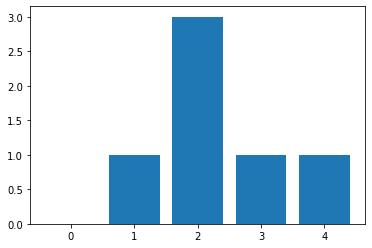

In [15]:
# リスト 3.6 ネットワークの次数分布
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
print("degree:", G.degree())
print(nx.degree_histogram(G))
print(nx.info(G))
plt.bar(range(5), height = nx.degree_histogram(G))

DiGraph with 6 nodes and 7 edges


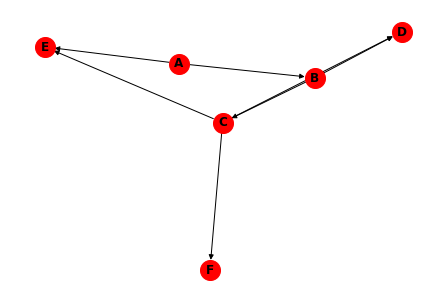

In [16]:
# リスト 3.7 有向グラフ
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print(nx.info(G))

degree: [('A', 2), ('B', 3), ('C', 5), ('D', 2), ('E', 2), ('F', 4)]
MultiGraph with 6 nodes and 9 edges


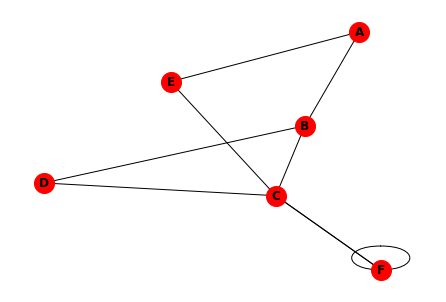

In [17]:
# リスト 3.8 多重辺と自己ループ
import networkx as nx
G = nx.MultiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F"), ("C", "F"), ("F", "F")])
print("degree:", G.degree())
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print(nx.info(G))

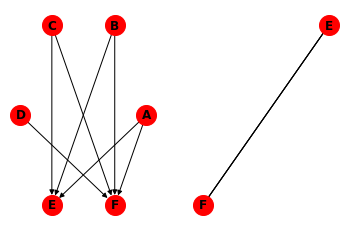

In [18]:
# リスト 3.9 共引用
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "E"), ("A", "F"), ("B", "E"), ("B", "F"), ("C", "E"), ("C", "F"), ("D", "F")])
plt.subplot(121)
nx.draw_circular(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
GC = nx.MultiGraph()
GC.add_nodes_from(["E", "F"])
GC.add_edges_from([("E", "F"), ("E", "F"), ("E", "F")])
plt.subplot(122)
nx.draw_circular(GC, node_size=400, node_color='red', with_labels=True, font_weight='bold')


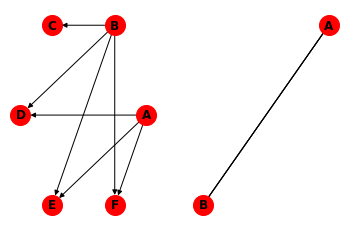

In [19]:
# リスト 3.10 書誌結合
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "D"), ("A", "E"), ("A", "F"), ("B", "C"), ("B", "D"), ("B", "E"), ("B", "F")])
plt.subplot(121)
nx.draw_circular(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
GB = nx.MultiGraph()
GB.add_nodes_from(["A", "B"])
GB.add_edges_from([("A", "B"), ("A", "B"), ("A", "B")])
plt.subplot(122)
nx.draw_circular(GB, node_size=400, node_color='red', with_labels=True, font_weight='bold')


In [20]:
# リスト 3.11 共引用の隣接行列
import networkx as nx
import numpy as np
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "E"), ("A", "F"), ("B", "E"), ("B", "F"), ("C", "E"), ("C", "F"), ("D", "F")])
print("sparse adjacency matrix:")
print(nx.adjacency_matrix(G))
print("dense adjacency matrix:")
print(nx.adjacency_matrix(G).todense())
A = nx.adjacency_matrix(G).todense()
AT = A.transpose()
M = np.dot(AT, A)
M = M - np.diag(np.diag(M))
print("co-citation adjacency matrix:")
print(M)

sparse adjacency matrix:
  (0, 4)	1
  (0, 5)	1
  (1, 4)	1
  (1, 5)	1
  (2, 4)	1
  (2, 5)	1
  (3, 5)	1
dense adjacency matrix:
[[0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
co-citation adjacency matrix:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 3]
 [0 0 0 0 3 0]]


top nodes : {1, 2, 3, 4}
bottom nodes : {'b', 'a', 'c'}
projected graph (top nodes): [(1, 2), (1, 4), (2, 3)]
projected graph (bottom nodes): [('b', 'a'), ('b', 'c')]


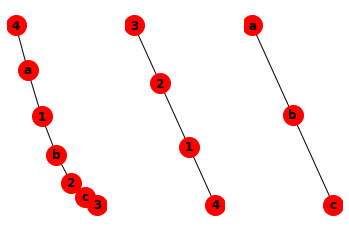

In [21]:
# リスト 3.12 2部グラフとプロジェクション
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])
plt.subplot(131)
nx.draw(B, node_size=400, node_color='red', with_labels=True, font_weight='bold')

top_nodes = set(n for n, d in B.nodes(data=True) if d['bipartite']==0)
bottom_nodes = set(B) - top_nodes
print("top nodes :", top_nodes)
print("bottom nodes :", bottom_nodes)

GT = bipartite.projected_graph(B, top_nodes)
print("projected graph (top nodes):", GT.edges())
plt.subplot(132)
nx.draw(GT, node_size=400, node_color='red', with_labels=True, font_weight='bold')
GB = bipartite.projected_graph(B, bottom_nodes)
print("projected graph (bottom nodes):", GB.edges())
plt.subplot(133)
nx.draw(GB, node_size=400, node_color='red', with_labels=True, font_weight='bold')

adjacency matrix A:
[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]
A * A:
[[2 0 2 1 0 0]
 [0 3 1 1 2 1]
 [2 1 4 1 0 0]
 [1 1 1 2 1 1]
 [0 2 0 1 2 1]
 [0 1 0 1 1 1]]
degree: [('A', 2), ('B', 3), ('C', 4), ('D', 2), ('E', 2), ('F', 1)]
A * A * A:
[[0 5 1 2 4 2]
 [5 2 7 4 1 1]
 [1 7 2 5 6 4]
 [2 4 5 2 2 1]
 [4 1 6 2 0 0]
 [2 1 4 1 0 0]]


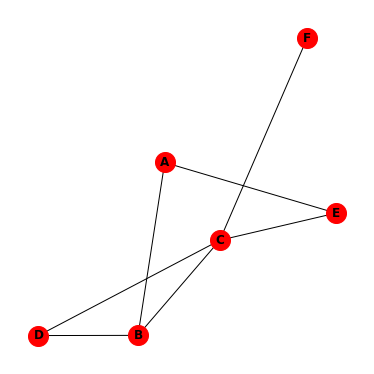

In [22]:
# リスト 3.13 隣接行列の積とパス
import networkx as nx
import numpy as np
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
plt.figure(figsize=(5, 5))
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
Z = nx.adjacency_matrix(G).todense()
print("adjacency matrix A:")
print(Z)
print("A * A:")
print(Z**2) # or np.dot(Z, Z) or Z.dot(Z)
print("degree:", G.degree())
print("A * A * A:")
print(Z**3)

A: diag = [0 0 0 0 0 0]
[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [1 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]]
A * A: diag = [0 0 0 0 0 0]
[[0 1 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 1]
 [0 0 2 0 0 0]
 [0 1 0 0 0 0]
 [1 0 1 0 1 0]]
A * A * A: diag = [0 0 0 0 0 0]
[[0 0 0 0 0 1]
 [1 0 1 0 1 0]
 [0 0 0 1 1 0]
 [0 2 0 0 0 0]
 [0 0 0 0 0 1]
 [0 1 2 0 0 0]]
A * A * A * A: diag = [0 1 1 0 1 1]
[[0 0 0 1 1 0]
 [0 1 2 0 0 0]
 [1 0 1 0 1 0]
 [0 0 0 0 0 2]
 [0 0 0 1 1 0]
 [0 2 0 0 0 1]]


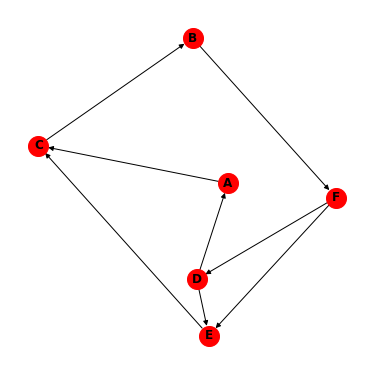

In [23]:
# リスト 3.14 隣接行列の積とサイクル
import networkx as nx
import numpy as np
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "C"), ("C", "B"), ("B", "F"), ("F", "D"), ("F", "E"), ("D", "E"), ("E", "C"), ("D", "A")])
plt.figure(figsize=(5, 5))
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
Z = nx.adjacency_matrix(G).todense()
print("A: diag =", np.diag(Z))
print(Z)
Z2 = Z**2 # or Z.dot(Z) or np.dot(Z,Z)
print("A * A: diag =", np.diag(Z2))
print(Z2)
Z3 = Z**3
print("A * A * A: diag =", np.diag(Z3))
print(Z3)
Z4 = Z**4
print("A * A * A * A: diag =", np.diag(Z4))
print(Z4)

cyclic: eigenvalues = [ 1.26716830e+00+0.j          2.60963880e-01+1.17722615j
  2.60963880e-01-1.17722615j -8.94548033e-01+0.53414855j
 -8.94548033e-01-0.53414855j -2.46519033e-32+0.j        ]
[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [1 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]]
acyclic: eigenvalues = [0. 0. 0. 0. 0. 0. 0.]
[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 1 1 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0]]


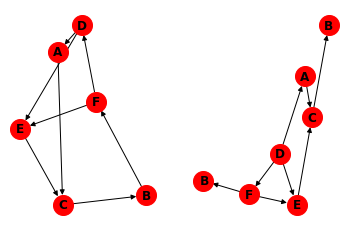

In [24]:
# リスト 3.15 非循環グラフの隣接行列の固有値
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "C"), ("C", "B"), ("B", "F"), ("F", "D"), ("F", "E"), ("D", "E"), ("E", "C"), ("D", "A")])
plt.subplot(121)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
Z = nx.adjacency_matrix(G).todense()
w, v = LA.eig(Z)
print("cyclic: eigenvalues =", w)
print(Z)
GA = nx.DiGraph()
GA.add_nodes_from(["A", "B", "C", "D", "E", "F"])
GA.add_edges_from([("A", "C"), ("C", "B"), ("F"," B"), ("D", "F"), ("F","E"), ("D", "E"), ("E", "C"), ("D", "A")])
plt.subplot(122)
nx.draw(GA, node_size=400, node_color='red', with_labels=True, font_weight='bold')
ZA = nx.adjacency_matrix(GA).todense()
wa, va = LA.eig(ZA)
print("acyclic: eigenvalues =", wa)
print(ZA)

[[0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 1 1]
 [0 0 1 0 0 0]
 [0 1 0 0 1 0]]
D->A, A->B, F->C, E->D, C->E, B->F
[[0 1 1 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]


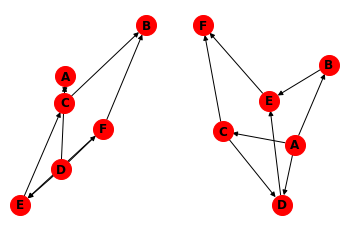

In [25]:
# リスト 3.16 DAGと上三角行列
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
GA = nx.DiGraph()
GA.add_nodes_from(["A", "B", "C", "D", "E", "F"])
GA.add_edges_from([("A", "C"), ("C", "B"), ("F", "B"), ("D", "F"), ("F", "E"), ("D", "E"), ("E", "C"), ("D", "A")])
plt.subplot(121)
nx.draw(GA, node_size=400, node_color='red', with_labels=True, font_weight='bold')
ZA = nx.adjacency_matrix(GA).todense()
print(ZA)
print("D->A, A->B, F->C, E->D, C->E, B->F")
GA2 = nx.DiGraph()
GA2.add_nodes_from(["A", "B", "C", "D", "E", "F"])#"B", "F", "E", "A", "D", "C"
GA2.add_edges_from([("B", "E"), ("E", "F"), ("C", "F"), ("A", "C"), ("C", "D"), ("A", "D"), ("D", "E"), ("A", "B")])
plt.subplot(122)
nx.draw(GA2, node_size=400, node_color='red', with_labels=True, font_weight='bold')
ZA2 = nx.adjacency_matrix(GA2).todense()
print(ZA2)

shortest path between A and F: ['A', 'B', 'C', 'F']
all shortest paths: [['A', 'B', 'C', 'F'], ['A', 'E', 'C', 'F']]
shortest path length: 3
diameter: 3


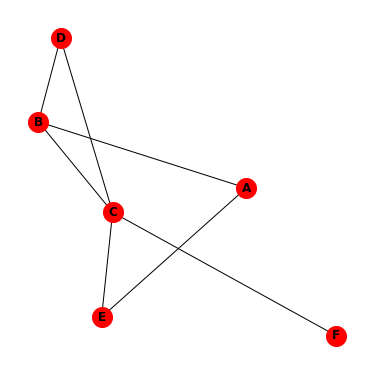

In [26]:
# リスト 3.17 グラフの直径
import networkx as nx
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
plt.figure(figsize=(5, 5))
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
Z = nx.adjacency_matrix(G).todense()
print("shortest path between A and F:", nx.shortest_path(G, "A", "F"))
print("all shortest paths:", [p for p in nx.all_shortest_paths(G, "A", "F")])
print("shortest path length:", nx.shortest_path_length(G, "A", "F"))
print("diameter:" , nx.diameter(G))

connected
number of connected components: 1
Laplacian matrix L:
[[ 2 -1  0  0 -1  0]
 [-1  3 -1 -1  0  0]
 [ 0 -1  4 -1 -1 -1]
 [ 0 -1 -1  2  0  0]
 [-1  0 -1  0  2  0]
 [ 0  0 -1  0  0  1]]
eigenvalues of L [5.269 3.865 2.534 -0.000 0.882 1.451]
disconnected
number of connected components: 2
Laplacian matrix L:
[[ 2 -1  0  0 -1  0]
 [-1  1  0  0  0  0]
 [ 0  0  2 -1  0 -1]
 [ 0  0 -1  1  0  0]
 [-1  0  0  0  1  0]
 [ 0  0 -1  0  0  1]]
eigenvalues of L [3.000 -0.000 1.000 3.000 1.000 -0.000]


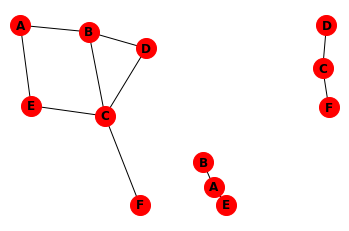

In [27]:
# リスト 3.18 連結成分の個数とグラフラプラシアンの固有値
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
plt.subplot(121)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("connected")
print("number of connected components:", nx.number_connected_components(G))
L = nx.laplacian_matrix(G).todense()
print("Laplacian matrix L:")
print(L)
np.set_printoptions(formatter={'float': '{:.3f}'.format})
print("eigenvalues of L", LA.eigvals(L))
print("disconnected")
G.remove_edges_from([("B", "C"), ("B", "D"), ("C", "E")])
plt.subplot(122)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("number of connected components:", nx.number_connected_components(G))
L = nx.laplacian_matrix(G).todense()
print("Laplacian matrix L:")
print(L)
print("eigenvalues of L", LA.eigvals(L))

number of strongly connected components: 1
edge F->D is deleted
number of strongly connected components: 3


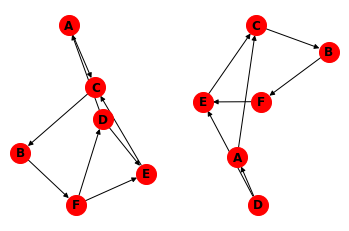

In [28]:
# リスト 3.19 グラフの強連結成分
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "C"), ("C", "B"), ("B", "F"), ("F", "D"), ("F", "E"), ("D", "E"), ("E", "C"), ("D", "A")])
plt.subplot(121)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("number of strongly connected components:", nx.number_strongly_connected_components(G))
print("edge F->D is deleted")
G.remove_edges_from([("F", "D")])
plt.subplot(122)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("number of strongly connected components:", nx.number_strongly_connected_components(G))

all paths from D to E
['D', 'E']
['D', 'A', 'C', 'B', 'F', 'E']
shortest path length from D to E: 1
shortest path length from E to D: 4
edge D->E is deleted
all paths from D to E
['D', 'A', 'C', 'B', 'F', 'E']
shortest path length from D to E: 5
shortest path length from E to D: 4


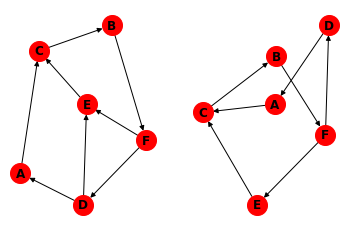

In [29]:
# リスト 3.20 辺の除去によるパス長の変化
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
from pprint import pprint
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "C"), ("C", "B"), ("B", "F"), ("F", "D"), ("F", "E"), ("D", "E"), ("E", "C"), ("D", "A")])
plt.subplot(121)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("all paths from D to E")
for path in nx.all_simple_paths(G, "D", "E"):
  print(path)
print("shortest path length from D to E:", nx.shortest_path_length(G, "D", "E"))
print("shortest path length from E to D:", nx.shortest_path_length(G, "E", "D"))
print("edge D->E is deleted")
G.remove_edges_from([("D", "E")])
plt.subplot(122)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("all paths from D to E")
for path in nx.all_simple_paths(G, "D", "E"):
  print(path)
print("shortest path length from D to E:", nx.shortest_path_length(G, "D", "E"))
print("shortest path length from E to D:", nx.shortest_path_length(G, "E", "D"))

{('A', 'C'): 1.0, ('A', 'D'): 1.0, ('B', 'C'): 1.0, ('B', 'F'): 1.0, ('C', 'E'): 1.0, ('D', 'F'): 1.0, ('D', 'E'): 1.0, ('E', 'F'): 1.0}
cut size of A and B {('F', 'B'), ('C', 'B')}
max flow of A and B 2.0
edge A-C is deleted
cut size of A and B {('A', 'D')}
max flow of A and B 1.0


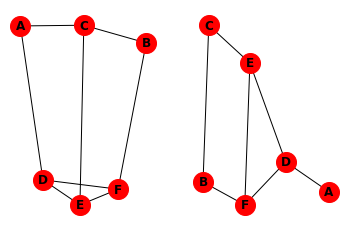

In [30]:
# リスト 3.21 グラフの最大流・最小カット
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
from pprint import pprint
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "C"), ("C", "B"), ("B", "F"), ("F", "D"), ("F", "E"), ("D", "E"), ("E", "C"), ("D", "A")], capacity=1.0)
capa=nx.get_edge_attributes(G, 'capacity')
print(capa)
plt.subplot(121)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
cut_edges = nx.algorithms.connectivity.minimum_edge_cut(G, "A", "B")
print("cut size of A and B", cut_edges)
flow_value, flow_dict = nx.algorithms.flow.maximum_flow(G, "A", "B")
print("max flow of A and B", flow_value)
print("edge A-C is deleted")
G.remove_edges_from([("A", "C")])
plt.subplot(122)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
cut_edges = nx.algorithms.connectivity.minimum_edge_cut(G, "A", "B")
print("cut size of A and B", cut_edges)
flow_value,flow_dict = nx.algorithms.flow.maximum_flow(G, "A", "B")
print("max flow of A and B", flow_value)

number of connected components: 1
Laplacian matrix L:
[[ 2 -1  0  0 -1  0]
 [-1  3 -1 -1  0  0]
 [ 0 -1  4 -1 -1 -1]
 [ 0 -1 -1  2  0  0]
 [-1  0 -1  0  2  0]
 [ 0  0 -1  0  0  1]]
eigenvalues of L: [5.269 3.865 2.534 -0.000 0.882 1.451]
some edges are deleted
number of connected components: 2
Laplacian matrix L:
[[ 2 -1  0  0 -1  0]
 [-1  1  0  0  0  0]
 [ 0  0  2 -1  0 -1]
 [ 0  0 -1  1  0  0]
 [-1  0  0  0  1  0]
 [ 0  0 -1  0  0  1]]
eigenvalues of L: [3.000 -0.000 1.000 3.000 1.000 -0.000]


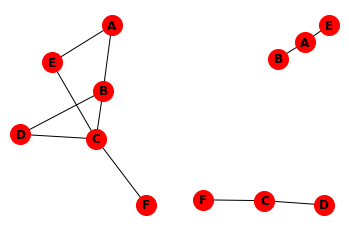

In [31]:
# リスト 3.22 グラフラプラシアンと固有値
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
plt.subplot(121)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("number of connected components:", nx.number_connected_components(G))
L = nx.laplacian_matrix(G).todense()
print("Laplacian matrix L:")
print(L)
np.set_printoptions(formatter={'float': '{:.3f}'.format})
print("eigenvalues of L:", LA.eigvals(L))
print("some edges are deleted")
G.remove_edges_from([("B", "C"), ("B", "D"), ("C", "E")])
plt.subplot(122)
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("number of connected components:", nx.number_connected_components(G))
L = nx.laplacian_matrix(G).todense()
print("Laplacian matrix L:")
print(L)
print("eigenvalues of L:", LA.eigvals(L))

CC of complete graph 1.0
CC of bipartite graph 0
CC of random graph 0.15384615384615385


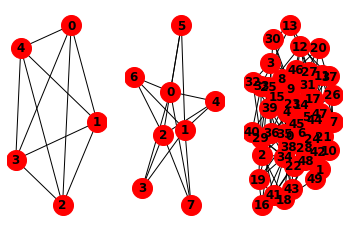

In [32]:
# リスト 3.23 完全グラフ、2部グラフ、ランダムグラフのクラスタ係数
import networkx as nx
import matplotlib.pyplot as plt

K_5 = nx.complete_graph(5)
plt.subplot(131)
nx.draw(K_5, node_size=400, node_color='red', with_labels=True, font_weight='bold')
K_3_5 = nx.complete_bipartite_graph(3, 5)
plt.subplot(132)
nx.draw(K_3_5, node_size=400, node_color='red', with_labels=True, font_weight='bold')
plt.subplot(133)
er = nx.erdos_renyi_graph(50, 0.15)
nx.draw(er, node_size=400, node_color='red', with_labels=True, font_weight='bold')

print("CC of complete graph", nx.clustering(K_5, 0))
print("CC of bipartite graph", nx.clustering(K_3_5, 0))
print("CC of random graph", nx.clustering(er, 0))

assortativity of star graph -1.000
assortativity of Barabasi-Albert graph -0.369
assortativity of barbell graph -0.050


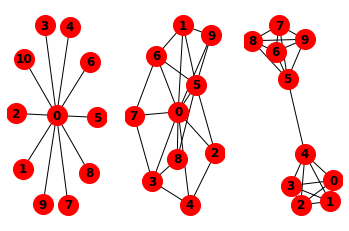

In [33]:
# リスト 3.24 starグラフ、Barabasi-Albertグラフ、barbellグラフのassortativity
import networkx as nx
import matplotlib.pyplot as plt

star = nx.star_graph(10)
plt.subplot(131)
nx.draw(star, node_size=400, node_color='red', with_labels=True, font_weight='bold')
ba = nx.barabasi_albert_graph(10, 3)
plt.subplot(132)
nx.draw(ba, node_size=400, node_color='red', with_labels=True, font_weight='bold')
plt.subplot(133)
bg = nx.barbell_graph(5,0)
nx.draw(bg, node_size=400, node_color='red', with_labels=True, font_weight='bold')

print("assortativity of star graph", '{:.3f}'.format(nx.degree_pearson_correlation_coefficient(star, 0)))
print("assortativity of Barabasi-Albert graph", '{:.3f}'.format(nx.degree_pearson_correlation_coefficient(ba, 0)))
print("assortativity of barbell graph", '{:.3f}'.format(nx.degree_pearson_correlation_coefficient(bg, 0)))

第4章　中心を見つける－さまざまな中心性

degree centrality:
C:0.4 D:0.3 G:0.3 H:0.3 I:0.3 E:0.2 F:0.2 A:0.1 B:0.1 J:0.1 K:0.1 

closeness centrality:
G:0.476 D:0.455 H:0.455 F:0.435 E:0.417 C:0.4 I:0.37 A:0.294 B:0.294 J:0.278 K:0.278 

eigenvector centrality:
D:0.447 G:0.435 C:0.42 H:0.36 E:0.328 F:0.309 I:0.196 A:0.161 B:0.161 J:0.075 K:0.075 

betweenness centrality:
H:0.485 C:0.396 I:0.378 G:0.337 D:0.304 F:0.133 E:0.122 A:0.0 B:0.0 J:0.0 K:0.0 

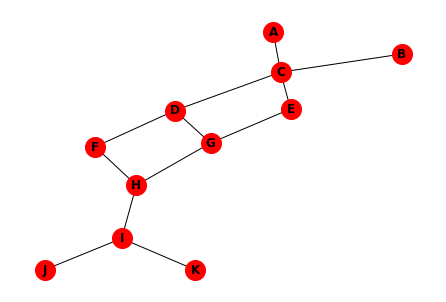

In [34]:
# リスト 4.1 次数中心性、近接中心性、固有ベクトル中心性、媒介中心性
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"])
G.add_edges_from([("A", "C"), ("B", "C"), ("C", "D"), ("C", "E"), ("D", "F"), ("D", "G"), ("E", "G"), ("F", "H"), ("G", "H"), ("H", "I"), ("I", "J"), ("I", "K")])

nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("degree centrality:")
for k, v in sorted(nx.degree_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")
print("closeness centrality:")
for k, v in sorted(nx.closeness_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")
print("eigenvector centrality:")
for k, v in sorted(nx.eigenvector_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")
print("\n")
print("betweenness centrality:")
for k, v in sorted(nx.betweenness_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")

     degree centrality: 0.48, 0.27, 0.30, 0.18, 0.09, 0.12, 0.12, 0.12, 0.15, 0.06, 0.09, 0.03, 0.06, 0.15, 0.06, 0.06, 0.06, 0.06, 0.06, 0.09, 0.06, 0.06, 0.06, 0.15, 0.09, 0.09, 0.06, 0.12, 0.09, 0.12, 0.12, 0.18, 0.36, 0.52 max: 33
betweenness centrality: 0.44, 0.05, 0.14, 0.01, 0.00, 0.03, 0.03, 0.00, 0.06, 0.00, 0.00, 0.00, 0.00, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.03, 0.00, 0.00, 0.00, 0.02, 0.00, 0.00, 0.00, 0.02, 0.00, 0.00, 0.01, 0.14, 0.15, 0.30 max: 0
  closeness centrality: 0.57, 0.49, 0.56, 0.46, 0.38, 0.38, 0.38, 0.44, 0.52, 0.43, 0.38, 0.37, 0.37, 0.52, 0.37, 0.37, 0.28, 0.38, 0.37, 0.50, 0.37, 0.38, 0.37, 0.39, 0.38, 0.38, 0.36, 0.46, 0.45, 0.38, 0.46, 0.54, 0.52, 0.55 max: 0
eigenvector centrality: 0.36, 0.27, 0.32, 0.21, 0.08, 0.08, 0.08, 0.17, 0.23, 0.10, 0.08, 0.05, 0.08, 0.23, 0.10, 0.10, 0.02, 0.09, 0.10, 0.15, 0.10, 0.09, 0.10, 0.15, 0.06, 0.06, 0.08, 0.13, 0.13, 0.13, 0.17, 0.19, 0.31, 0.37 max: 33
   PageRank centrality: 0.10, 0.05, 0.06, 0.04, 0.02, 0.03, 0.

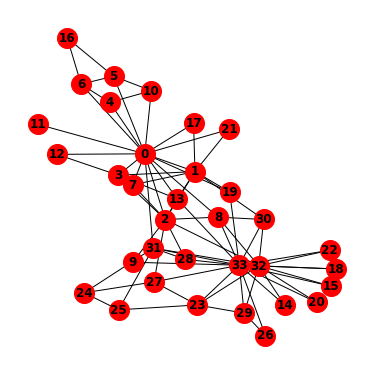

In [35]:
# リスト 4.2 Zachary's karate clubネットワークの中心性
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
v = list(nx.degree_centrality(G).values())
s = ("     degree centrality: "+', '.join(['%.2f']*len(v))) % tuple(v)
print(s, "max:", np.argmax(v))

v = list(nx.betweenness_centrality(G).values())
s = ("betweenness centrality: "+', '.join(['%.2f']*len(v))) % tuple(v)
print(s, "max:", np.argmax(v))

v = list(nx.closeness_centrality(G).values())
s = ("  closeness centrality: "+', '.join(['%.2f']*len(v))) % tuple(v)
print(s, "max:", np.argmax(v))

v = list(nx.eigenvector_centrality(G).values())
s = ("eigenvector centrality: "+', '.join(['%.2f']*len(v))) % tuple(v)
print(s, "max:", np.argmax(v))

v = list(nx.pagerank(G).values())
s = ("   PageRank centrality: "+', '.join(['%.2f']*len(v))) % tuple(v)
print(s, "max:", np.argmax(v))

v = list(nx.katz_centrality(G).values())
s = ("       Katz centrality: "+', '.join(['%.2f']*len(v))) % tuple(v)
print(s, "max:", np.argmax(v))

第5章　経路を見つける－ネットワークの探索

BFS: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26)]
depth 1: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31)]
depth 2: [(1, 30), (2, 28), (2, 9), (5, 16), (8, 33), (2, 32), (31, 24), (31, 25), (2, 27)]
depth 3: [(27, 23), (32, 22), (32, 15), (32, 20), (33, 26), (32, 14), (32, 18), (32, 29)]
depth 4: []
depth 5: []


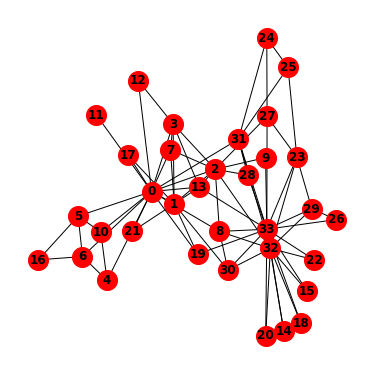

In [36]:
# リスト 5.1 Zachary's karate clubネットワークでの幅優先探索
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')
print("BFS:", list(nx.bfs_edges(G, source=0)))

d1 = list(nx.bfs_edges(G, source=0, depth_limit=1))
print("depth 1:", d1)
d2 = list(nx.bfs_edges(G, source=0, depth_limit=2))
print("depth 2:", list(set(d2)-set(d1)))
d3 = list(nx.bfs_edges(G, source=0, depth_limit=3))
print("depth 3:", list(set(d3)-set(d2)))
d4 = list(nx.bfs_edges(G, source=0, depth_limit=4))
print("depth 4:", list(set(d4)-set(d3)))
d5 = list(nx.bfs_edges(G, source=0, depth_limit=5))
print("depth 5:", list(set(d5)-set(d4)))

[0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2]


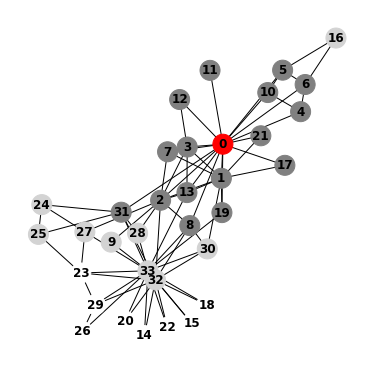

In [37]:
# リスト 5.2 幅優先探索の距離に応じた可視化
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
known = [0] * nx.number_of_nodes(G) 
dist = [-1] * nx.number_of_nodes(G)
colors = ['red', 'gray', 'lightgray', 'white']
color_map = ['black'] * nx.number_of_nodes(G)

start = 0
dist[start] = 0
color_map[start] = colors[dist[start]]
known[start] = 1

d = 0
while sum(known) != nx.number_of_nodes(G) :
  for n in nx.nodes(G) :
    if nx.shortest_path_length(G, start, n) == d :
      for nb in G.neighbors(n) :
        if known[nb] != 1 :
          dist[nb] = d + 1
          color_map[nb] = colors[dist[nb]]
          known[nb] = 1
  d = d + 1

print(dist)
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color=color_map, with_labels=True, font_weight='bold')

DFS: [(0, 1), (1, 2), (2, 3), (3, 7), (3, 12), (3, 13), (13, 33), (33, 8), (8, 30), (30, 32), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (23, 25), (25, 24), (24, 27), (24, 31), (31, 28), (23, 29), (29, 26), (33, 9), (33, 19), (1, 17), (1, 21), (0, 4), (4, 6), (6, 5), (5, 10), (5, 16), (0, 11)]
traversed nodes: [0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]


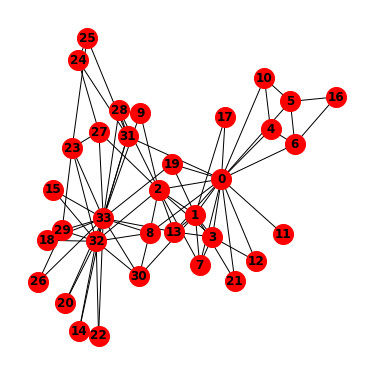

In [38]:
# リスト 5.3 Zachary's karate clubネットワークでの深さ優先探索
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')

print("DFS:", list(nx.dfs_edges(G, source=0)))
print("traversed nodes:", list(nx.dfs_preorder_nodes(G, source=0)))

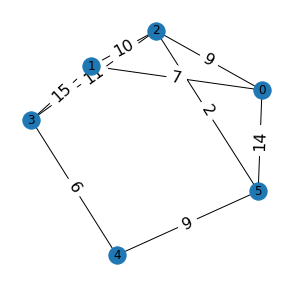

[999, 0, 999, 999, 999, 999]
[0, 0, 0, 0, 0, 0]
[7, 0, 10, 15, 999, 999]
[0, 1, 0, 0, 0, 0]
[7, 0, 10, 15, 999, 21]
[1, 1, 0, 0, 0, 0]
[7, 0, 10, 15, 999, 12]
[1, 1, 1, 0, 0, 0]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 0, 0, 1]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 1, 0, 1]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 1, 1, 1]


In [39]:
# リスト 5.4 ダイクストラのアルゴリズム
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import functools
import operator

G = nx.Graph()
G.add_nodes_from(range(0, 5))
G.add_weighted_edges_from([(0, 1, 7), (0, 2, 9), (0, 5, 14), (1, 2, 10), (1, 3, 15), (2, 3, 11), (2, 5, 2), (3, 4, 6), (4, 5, 9)])

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_size=16, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

dist_estimate = [999] * nx.number_of_nodes(G)
dist_certainty = [0] * nx.number_of_nodes(G)
dist_estimate[1] = 0

while functools.reduce(operator.mul, dist_certainty) == 0 :
  print(dist_estimate)
  print(dist_certainty)
  min_v = 999
  for n in nx.nodes(G) :
    if (dist_certainty[n] == 0) and (dist_estimate[n] <= min_v) :
      min_v = dist_estimate[n]
      min_id = n
  dist_certainty[min_id] = 1
  for nb in G.neighbors(min_id) :
    new_estimate = G[min_id][nb]['weight'] + dist_estimate[min_id]
    if new_estimate < dist_estimate[nb] :
      dist_estimate[nb] = new_estimate
      
print(dist_estimate)
print(dist_certainty)

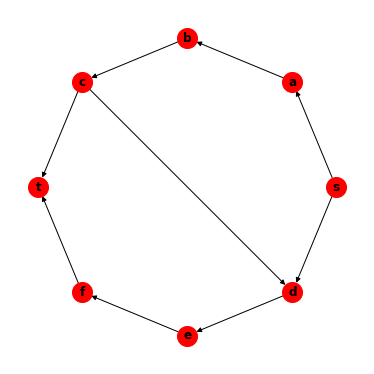

In [40]:
# リスト 5.5 2頂点間の独立のパス
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edge('s','a')
G.add_edge('a','b')
G.add_edge('b','c')
G.add_edge('c','t')
G.add_edge('f','t')
G.add_edge('e','f')
G.add_edge('d','e')
G.add_edge('s','d')
G.add_edge('c','d')

plt.figure(figsize=(5, 5))
nx.draw_circular(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')

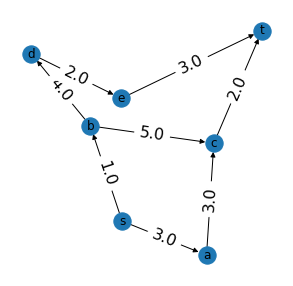

flow value from s to t: 3.0
the value of flow through edge s-b: 1.0
the value of flow through edge s-a: 2.0
min cut value between s and t: 3.0
reachable nodes from s: {'s', 'a', 'c'}
unreachable nodes from s: {'b', 'd', 't', 'e'}
cut set: [('c', 't'), ('s', 'b')]
min cut value == sum of cut set capacity?: True


In [41]:
# リスト 5.6 最大流最小カット
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.DiGraph()
G.add_edge('s','a', capacity=3.0)
G.add_edge('s','b', capacity=1.0)
G.add_edge('a','c', capacity=3.0)
G.add_edge('b','c', capacity=5.0)
G.add_edge('b','d', capacity=4.0)
G.add_edge('d','e', capacity=2.0)
G.add_edge('c','t', capacity=2.0)
G.add_edge('e','t', capacity=3.0)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_size=16, edge_labels={(u, v): d["capacity"] for u, v, d in G.edges(data=True)})
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

flow_value, flow_dict = nx.maximum_flow(G, 's', 't')
print("flow value from s to t:", flow_value)
print("the value of flow through edge s-b:", flow_dict['s']['b'])
print("the value of flow through edge s-a:", flow_dict['s']['a'])

cut_value, partition = nx.minimum_cut(G, 's', 't')
reachable, non_reachable = partition
print("min cut value between s and t:", cut_value)
print("reachable nodes from s:", reachable)
print("unreachable nodes from s:", non_reachable)

cutset = set()
for u, nbrs in ((n, G[n]) for n in reachable):
  cutset.update((u, v) for v in nbrs if v in non_reachable)
print("cut set:", sorted(cutset))

print("min cut value == sum of cut set capacity?:", cut_value == sum(G[u][v]['capacity'] for (u, v) in cutset))


第6章　グループを見つける－分割と抽出

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}, {32, 33, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


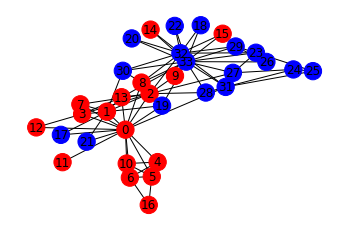

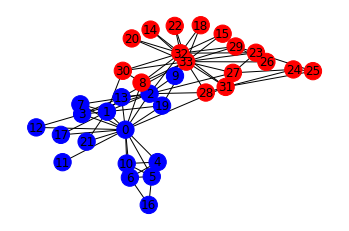

In [42]:
# リスト 6.1 Kernighan-Linアルゴリズムによるネットワーク分割
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import kernighan_lin_bisection

G = nx.karate_club_graph()
colors = ['red', 'blue', 'green']
pos = nx.spring_layout(G)

init_nodes = np.array_split(G.nodes(), 2)
init_partition = [set(init_nodes[0]), set(init_nodes[1])]
print(init_partition)

color_map_i = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in init_partition :
  for n in c :
    color_map_i[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_i)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

lst_b = kernighan_lin_bisection(G, partition=init_partition)
color_map_b = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in lst_b :
  for n in c :
    color_map_b[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_b)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

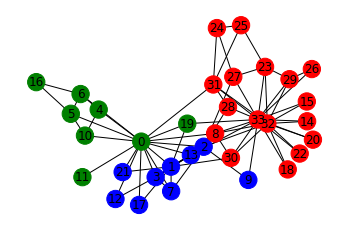

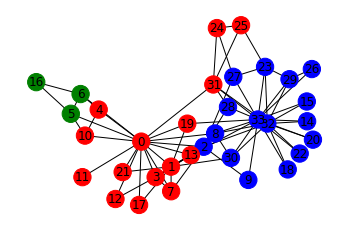

In [43]:
# リスト 6.2 モジュラリティ最適化とラベル伝搬によるコミュニティ抽出
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities

G = nx.karate_club_graph()
colors = ['red', 'blue', 'green']
pos = nx.spring_layout(G)

lst_m = greedy_modularity_communities(G)
color_map_m = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in lst_m :
  for n in c :
    color_map_m[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_m)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

lst_l = label_propagation_communities(G)
color_map_l = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in lst_l :
  for n in c :
    color_map_l[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_l)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

第7章　似たネットワークを作る－モデル化

Graph with 100 nodes and 514 edges
Graph with 100 nodes and 291 edges
Graph with 100 nodes and 4950 edges
Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


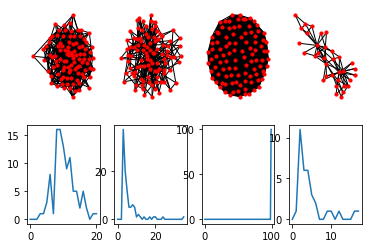

In [44]:
# リスト 7.1 ランダムグラフ、スケールフリーネットワーク、完全グラフ、Zachary's karate clubネットワークの次数分布
import networkx as nx
import matplotlib.pyplot as plt

er = nx.erdos_renyi_graph(100, 0.1)
plt.subplot(241)
nx.draw(er, node_size=10, node_color='red')
print(nx.info(er))
plt.subplot(245)
plt.plot(nx.degree_histogram(er))

ba = nx.barabasi_albert_graph(100, 3)
plt.subplot(242)
nx.draw(ba, node_size=10, node_color='red')
print(nx.info(ba))
plt.subplot(246)
plt.plot(nx.degree_histogram(ba))

K_100 = nx.complete_graph(100)
plt.subplot(243)
nx.draw(K_100, node_size=10, node_color='red')
print(nx.info(K_100))
plt.subplot(247)
plt.plot(nx.degree_histogram(K_100))

karate = nx.karate_club_graph()
plt.subplot(244)
nx.draw(karate, node_size=10, node_color='red')
print(nx.info(karate))
plt.subplot(248)
plt.plot(nx.degree_histogram(karate))

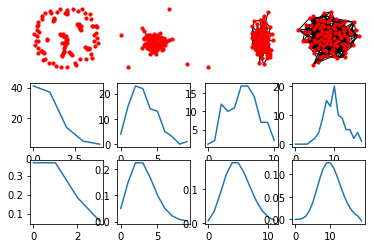

In [45]:
# リスト 7.2 ランダムグラフの次数分布とポアソン分布
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

def p1(x):
  return (1**x)*(np.e**(-1))/scipy.special.factorial(x) #scipy.misc.factorial -> scipy.special.factorial
def p3(x):
  return (3**x)*(np.e**(-3))/scipy.special.factorial(x)
def p5(x):
  return (5**x)*(np.e**(-5))/scipy.special.factorial(x)
def p10(x):
  return (10**x)*(np.e**(-10))/scipy.special.factorial(x)

er01 = nx.erdos_renyi_graph(100, 0.01)
plt.subplot(3,4,1)
nx.draw(er01, node_size=10, node_color='red')
plt.subplot(3,4,5)
plt.plot(nx.degree_histogram(er01))
er1 = nx.erdos_renyi_graph(100, 0.03)
plt.subplot(3,4,2)
nx.draw(er1, node_size=10, node_color='red')
plt.subplot(3,4,6)
plt.plot(nx.degree_histogram(er1))
er5 = nx.erdos_renyi_graph(100, 0.05)
plt.subplot(3,4,3)
nx.draw(er5, node_size=10, node_color='red')
plt.subplot(3,4,7)
plt.plot(nx.degree_histogram(er5))
er8 = nx.erdos_renyi_graph(100, 0.1)
plt.subplot(3,4,4)
nx.draw(er8, node_size=10, node_color='red')
plt.subplot(3,4,8)
plt.plot(nx.degree_histogram(er8))

plt.subplot(3,4,9)
x = np.arange(0, 4, 1)
y = p1(x)
plt.plot(x, y)
plt.subplot(3,4,10)
x = np.arange(0, 10, 1)
y = p3(x)
plt.plot(x, y)
plt.subplot(3,4,11)
x = np.arange(0, 12, 1)
y = p5(x)
plt.plot(x, y)
plt.subplot(3,4,12)
x = np.arange(0, 20, 1)
y = p10(x)
plt.plot(x, y)

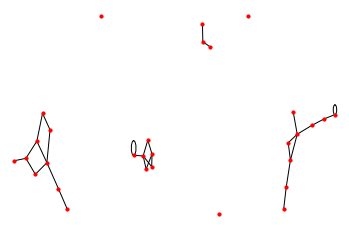

In [46]:
# リスト 7.3 コンフィギュレーションモデル
import networkx as nx
import matplotlib.pyplot as plt

deg_seq = [0,1,1,2,2,2,2,3,3,4]
plt.subplot(1,3,1)
G1 = nx.configuration_model(deg_seq)
nx.draw_spring(G1, node_size=10, node_color='red')

plt.subplot(1,3,2)
G2 = nx.configuration_model(deg_seq)
nx.draw_spring(G2, node_size=10, node_color='red')

plt.subplot(1,3,3)
G3 = nx.configuration_model(deg_seq)
nx.draw_spring(G3, node_size=10, node_color='red')


Graph with 1000 nodes and 2991 edges


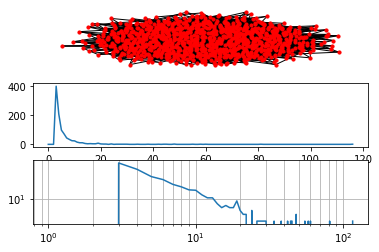

In [47]:
# リスト 7.4 スケールフリーネットワークの次数分布
import networkx as nx
import matplotlib.pyplot as plt

ba = nx.barabasi_albert_graph(1000, 3)
plt.subplot(3,1,1)
nx.draw(ba, node_size=10, node_color='red')
print(nx.info(ba))
plt.subplot(3,1,2)
plt.plot(nx.degree_histogram(ba))
plt.subplot(3,1,3)
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both")
plt.plot(nx.degree_histogram(ba))

rewiring 0%
L = 12.878787878787879
C = 0.5
rewiring 30%
L = 3.834343434343434
C = 0.1934285714285714
rewiring 100%
L = 3.5072727272727273
C = 0.05550000000000001


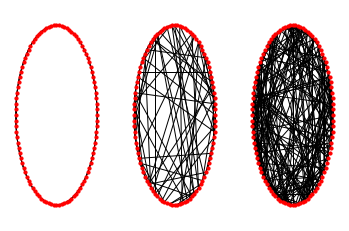

In [48]:
# リスト 7.5 スモールワールドネットワーク
import networkx as nx
import matplotlib.pyplot as plt

plt.subplot(1,3,1)
ws0 = nx.watts_strogatz_graph(100, 4, 0)
nx.draw_circular(ws0, node_size=10, node_color='red')
print("rewiring 0%")
print("L =", nx.average_shortest_path_length(ws0))
print("C =", nx.average_clustering(ws0))
plt.subplot(1,3,2)
ws03 = nx.watts_strogatz_graph(100, 4, 0.3)
nx.draw_circular(ws03, node_size=10, node_color='red')
print("rewiring 30%")
print("L =", nx.average_shortest_path_length(ws03))
print("C =", nx.average_clustering(ws03))
plt.subplot(1,3,3)
ws1 = nx.watts_strogatz_graph(100, 4, 1)
nx.draw_circular(ws1, node_size=10, node_color='red')
print("rewiring 100%")
print("L =", nx.average_shortest_path_length(ws1))
print("C =", nx.average_clustering(ws1))

第8章　似た頂点を見つける－将来の構造予測

vertex pair: 4 and 5
neighbors of 4 : [0, 6, 10]
neighbors of 5 : [0, 6, 10, 16]
degree of 4 : 3
degree of 5 : 4
common neighbosr: 3
Jaccard coefficient: 0.75
Adamic/Adar: 1.9922605072935597
preferential attachment: 12


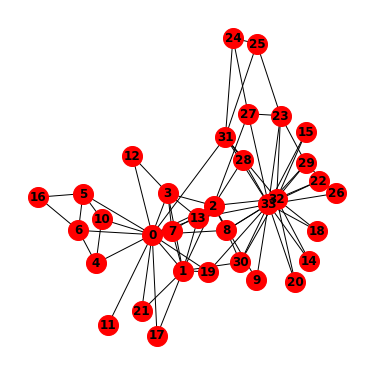

In [49]:
# リスト 8.1 頂点間の類似度(common neighbors、Jaccard coefficient、Adamic/Adar、preferential attachment)
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')
x = 4
y = 5
print("vertex pair:", x, "and", y)
print("neighbors of", x, ":", list(G.neighbors(x)))
print("neighbors of", y, ":", list(G.neighbors(y)))
print("degree of", x, ":", G.degree(x))
print("degree of", y, ":", G.degree(y))

print("common neighbosr:", len(list(nx.common_neighbors(G, x, y))))
print("Jaccard coefficient:", list(nx.jaccard_coefficient(G, [(x, y)]))[0][2])
print("Adamic/Adar:", list(nx.adamic_adar_index(G, [(x, y)]))[0][2])
print("preferential attachment:", list(nx.preferential_attachment(G, [(x, y)]))[0][2])

common neighbors
[(2, 33, 6), (0, 33, 4), (7, 13, 4), (0, 32, 3), (1, 8, 3), (1, 33, 3), (2, 30, 3), (2, 31, 3), (4, 5, 3), (6, 10, 3)]
Jaccard coefficient
[(14, 15, 1.0), (14, 18, 1.0), (14, 20, 1.0), (14, 22, 1.0), (15, 18, 1.0), (15, 20, 1.0), (15, 22, 1.0), (17, 21, 1.0), (18, 20, 1.0), (18, 22, 1.0)]
Adamic/Adar
[(2, 33, 4.719381261461351), (0, 33, 2.7110197222973085), (1, 33, 2.252921681630931), (4, 5, 1.9922605072935597), (6, 10, 1.9922605072935597), (7, 13, 1.8081984819901584), (2, 31, 1.6733425912309228), (23, 31, 1.6656249548734432), (23, 24, 1.631586747071319), (0, 32, 1.613740043014111)]
preferential attachment
[(0, 33, 272), (0, 32, 192), (2, 33, 170), (1, 33, 153), (1, 32, 108), (3, 33, 102), (0, 23, 80), (3, 32, 72), (5, 33, 68), (6, 33, 68)]


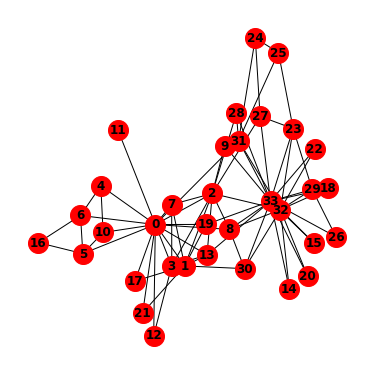

In [50]:
# リスト 8.2 頂点間の類似度によるリンク予測
import networkx as nx
import matplotlib.pyplot as plt

CN = []
JC = []
AA = []
PA = []
k = 10
G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')
n = nx.number_of_nodes(G)
for x in range(n):
  for y in range(x+1, n):
    if not(G.has_edge(x, y)):
      CN.append(tuple([x, y, len(list(nx.common_neighbors(G, x, y)))]))
      JC.append(list(nx.jaccard_coefficient(G, [(x, y)]))[0])
      AA.append(list(nx.adamic_adar_index(G, [(x, y)]))[0])
      PA.append(list(nx.preferential_attachment(G, [(x, y)]))[0])
print("common neighbors")
print(sorted(CN, key=lambda x:x[2], reverse=True)[:k])
print("Jaccard coefficient")
print(sorted(JC, key=lambda x:x[2], reverse=True)[:k])
print("Adamic/Adar")
print(sorted(AA, key=lambda x:x[2], reverse=True)[:k])
print("preferential attachment")
print(sorted(PA, key=lambda x:x[2], reverse=True)[:k])

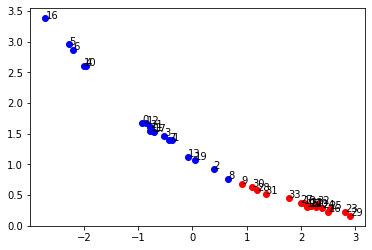

In [51]:
# リスト 8.3 Zachary's karate clubネットワークのnetwork embedding
import networkx as nx
import matplotlib.pyplot as plt
import random
from gensim.models import Word2Vec as word2vec

def make_random_walks(G, num_of_walk, length_of_walk):
  walks = list()
  for i in range(num_of_walk):
    node_list = list(G.nodes())
    for node in node_list:
      current_node = node
      walk = list()
      walk.append(str(node))
      for j in range(length_of_walk):
        next_node = random.choice(list(G.neighbors(current_node)))
        walk.append(str(next_node))
        current_node = next_node
      walks.append(walk)
  return walks

G = nx.karate_club_graph()
walks = make_random_walks(G, 100, 20)
model = word2vec(walks, min_count=0, size=2, window=5, workers=1)

x = list()
y = list()
node_list = list()
colors = list()
fig, ax = plt.subplots()
for node in G.nodes():
  vector = model.wv[str(node)]
  x.append(vector[0])
  y.append(vector[1])
  ax.annotate(str(node), (vector[0], vector[1]))
  if G.nodes[node]["club"] == "Officer":
    colors.append("r")
  else:
    colors.append("b")
for i in range(len(x)):
  ax.scatter(x[i], y[i], c=colors[i])
plt.show()




In [52]:
# リスト 8.4 network embeddingによるリンク予測
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from gensim.models import Word2Vec as word2vec

def make_random_walks(G, num_of_walk, length_of_walk):
  walks = list()
  for i in range(num_of_walk):
    node_list = list(G.nodes())
    for node in node_list:
      current_node = node
      walk = list()
      walk.append(str(node))
      for j in range(length_of_walk):
        next_node = random.choice(list(G.neighbors(current_node)))
        walk.append(str(next_node))
        current_node = next_node
      walks.append(walk)
  return walks

G = nx.karate_club_graph()
walks = make_random_walks(G, 100, 20)
model = word2vec(walks, min_count=0, size=5, window=5, workers=1)

vlist = list()
for node in G.nodes():
  vector = model.wv[str(node)]
  print("%s:"%(str(node)), end="")
  print(vector)
  vlist.append(vector)

DW = []
k = 10
n = nx.number_of_nodes(G)
for x in range(n):
  for y in range(x+1, n):
    if not(G.has_edge(x, y)):
      DW.append(tuple([x, y, np.linalg.norm(vlist[x]-vlist[y])]))
print("link prediction based on network embedding")
print(sorted(DW, key=lambda x:x[2], reverse=False)[:k])

0:[0.638 0.380 0.915 -0.841 -1.687]
1:[1.661 0.346 1.429 -0.339 -0.509]
2:[1.614 0.338 0.393 0.131 -0.022]
3:[1.750 0.095 1.519 -0.500 -0.905]
4:[-0.977 1.134 0.825 -1.974 -2.241]
5:[-1.257 1.228 0.668 -2.469 -2.327]
6:[-1.087 1.160 0.574 -2.459 -2.361]
7:[1.447 0.280 1.345 -0.354 -0.978]
8:[0.674 0.915 0.312 -0.213 0.547]
9:[1.033 0.723 -0.247 -0.171 0.804]
10:[-0.799 1.064 0.927 -1.996 -2.303]
11:[0.263 0.641 0.878 -0.521 -1.686]
12:[1.150 0.435 1.616 -0.423 -1.478]
13:[1.355 0.350 0.878 -0.325 -0.279]
14:[0.555 1.386 -0.620 -0.119 1.562]
15:[0.556 1.353 -1.012 -0.187 1.553]
16:[-1.452 1.341 0.342 -2.724 -2.765]
17:[1.086 0.423 1.402 -0.554 -1.267]
18:[0.589 1.354 -0.822 -0.070 1.417]
19:[0.749 0.602 0.779 -0.459 -0.237]
20:[0.479 1.303 -0.870 -0.332 1.451]
21:[0.960 0.409 1.350 -0.635 -1.065]
22:[0.573 1.371 -0.904 -0.132 1.531]
23:[0.525 1.211 -2.398 0.112 0.742]
24:[0.913 0.896 -2.369 1.032 -1.047]
25:[0.709 1.228 -2.554 1.161 -0.838]
26:[0.434 1.484 -2.080 -0.236 1.443]
27:[1.162

第9章　病気や口コミの広がりをモデル化する－感染、情報伝搬

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  del sys.path[0]


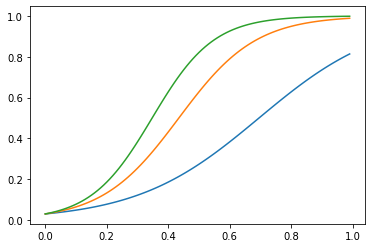

In [53]:
# リスト 9.1 SI modelでの感染者割合の時間変化
import matplotlib.pyplot as plt
from scipy import optimize, exp

x = range(100)
y = [0] * 100
x0 = 0.03
b = 5
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * exp(b * (x * 0.01))/(1 - x0 + x0 * exp(b * (x * 0.01))), x)))
b = 8
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * exp(b * (x * 0.01))/(1 - x0 + x0 * exp(b * (x * 0.01))), x)))
b = 10
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * exp(b * (x * 0.01))/(1 - x0 + x0 * exp(b * (x * 0.01))), x)))
plt.show()

In [54]:
# リスト 9.2 NDlibによるSIR modelでの感染者数の時間変化
!pip install -q ndlib
!pip install -q bokeh

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#import ndlib.models.epidemics.SIRModel as sir
import ndlib.models.epidemics as ep

g = nx.erdos_renyi_graph(1000, 0.1)
print(nx.info(g))

#model = sir.SIRModel(g)
model = ep.SIRModel(g)

import ndlib.models.ModelConfig as mc

config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(config)

iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

from bokeh.io import output_notebook, show
output_notebook()
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model, trends)
p = viz.plot(width=400, height=400)
show(p)

from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
viz2 = DiffusionPrevalence(model, trends)
p2 = viz2.plot(width=400, height=400)
show(p2)


     |████████████████████████████████| 110 kB 5.1 MB/s 
     |████████████████████████████████| 3.2 MB 38.5 MB/s 
Graph with 1000 nodes and 50187 edges


第10章　ネットワークを俯瞰する－可視化による分析

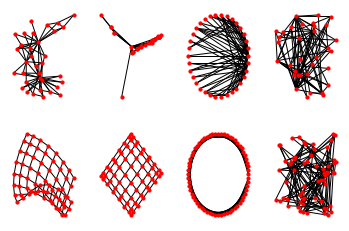

In [55]:
# リスト 10.1 バネ配置、スペクトラル配置、円周配置、ランダム配置によるネットワーク可視化
import networkx as nx
import matplotlib.pyplot as plt

karate = nx.karate_club_graph()
plt.subplot(241)
nx.draw_spring(karate, node_size=10, node_color='red')
plt.subplot(242)
nx.draw_spectral(karate, node_size=10, node_color='red')
plt.subplot(243)
nx.draw_circular(karate, node_size=10, node_color='red')
plt.subplot(244)
nx.draw_random(karate, node_size=10, node_color='red')

grid = nx.grid_graph(dim=[8,8])
plt.subplot(245)
nx.draw_spring(grid, node_size=10, node_color='red')
plt.subplot(246)
nx.draw_spectral(grid, node_size=10, node_color='red')
plt.subplot(247)
nx.draw_circular(grid, node_size=10, node_color='red')
plt.subplot(248)
nx.draw_random(grid, node_size=10, node_color='red')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

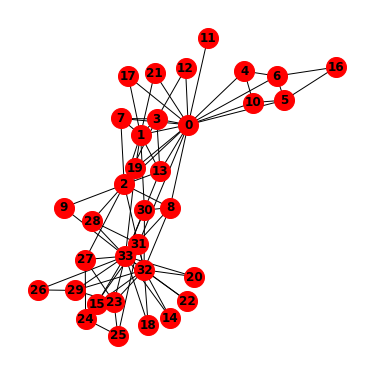

In [56]:
# リスト 10.2 GEXFフォーマットによるネットワークの出力
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')

str = ''.join(nx.generate_gexf(G))
with open('karate.gexf', 'w') as f:
  f.write(str)

files.download('karate.gexf')